# Baseline

This notebook allows to see the performance of the baseline model and its limitations.

***Author:*** [Paulo Ribeiro](mailto:paulo.ribeirodecarvalho@epfl.ch) 

## Import

In [1]:
import pandas as pd
from feature_extraction import load_split_image_paths, ImageVectorization
from random_forest import Classifier

%load_ext autoreload
%autoreload 2

## Data

Load the data and split it in train and test set. Note that no validation set is created since no time to go through a hyperparameter tuning for this coding test.

In [2]:
# Define the data path
data_path = "../data/"
categories = ["cloudy", "desert", "green_area", "water"]

train_paths, test_paths, train_labels, test_labels = load_split_image_paths(
    data_path=data_path, categories=categories, test_size=0.1
)

          0     1     2     3
train  1350  1017  1350  1350
test    150   114   150   150
{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


## Feature engineering

Compute features from the images and retrieve its vectorization that will be applied later for the classifier model. I display the first 5 rows of the `train_features` variable to explicitly show the features generated.

In [3]:
# Instantiate feature extractor and transform data
vectorizer = ImageVectorization()
train_features = vectorizer.transform(train_paths, show_df=True)
test_features = vectorizer.transform(test_paths, show_df=False)

,red_mean,green_mean,blue_mean,red_std,green_std,blue_std,gray_contrast,gray_correlation,gray_energy,gray_homogeneity
0,-0.994090,-1.272559,-1.099756,-0.286322,0.180704,-0.208733,-0.218996,0.819522,1.590768,0.363388
1,-0.938507,-1.060978,-1.040714,-0.431342,-0.361024,-0.527148,-0.449404,0.735110,0.101623,0.684075
2,1.444217,1.261493,0.994997,-0.188557,-0.269743,-0.264748,-0.481285,1.004214,-0.038875,1.359903
3,1.250514,1.037844,0.820834,-0.284410,-0.380776,-0.387993,-0.484339,0.966627,0.221834,1.417406
4,1.351469,1.149375,1.022623,-0.288045,-0.380804,-0.406849,-0.494535,0.999856,0.431005,1.639422


## Train model

In [4]:
# Instantiate classifier and train
classifier = Classifier()
classifier.train(train_features, train_labels)

## Evaluate model

              precision    recall  f1-score   support

      cloudy       0.99      0.99      0.99       150
      desert       1.00      0.99      1.00       114
  green_area       1.00      0.99      0.99       150
       water       0.98      1.00      0.99       150

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564



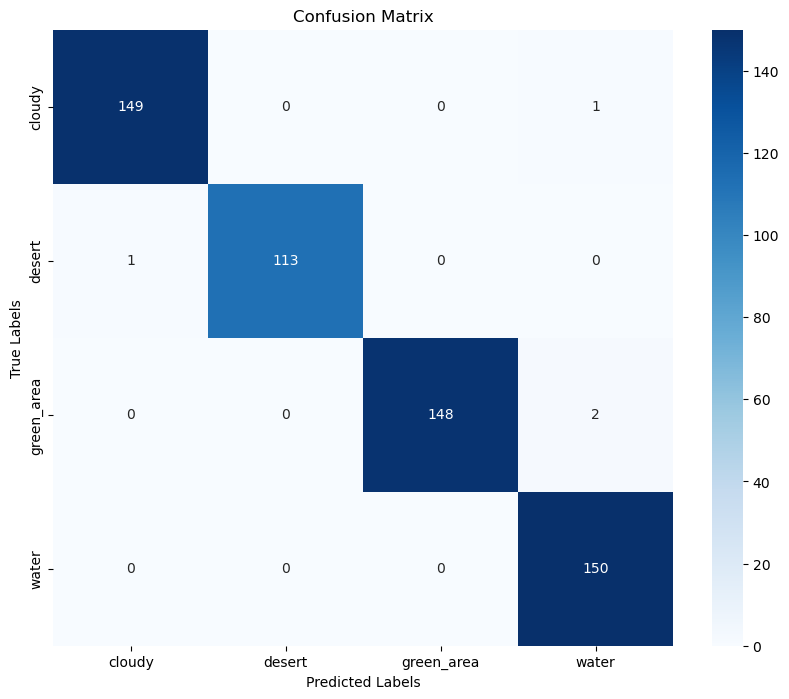

Number of misclassified images: 4


3    3
0    1
Name: count, dtype: int64

In [5]:
misclassified_imgs, wrong_predictions = classifier.evaluate(
    test_features, test_labels, img_paths=test_paths
)

print(f"Number of misclassified images: {len(misclassified_imgs)}")
pd.Series(wrong_predictions).value_counts()

## Limitations

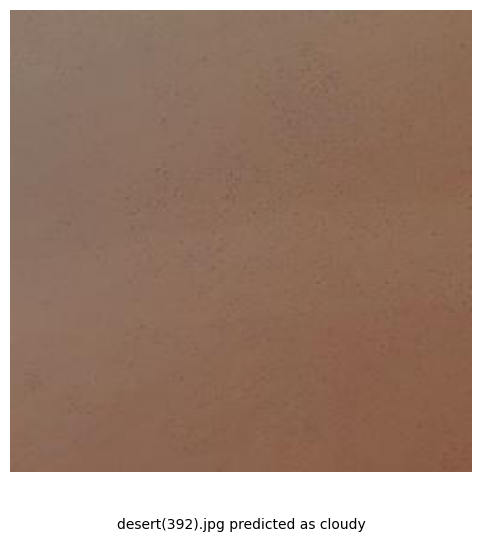

In [8]:
idx = 1
classifier.look_at_misclassified(
    misclassified_imgs=misclassified_imgs, idx=idx, wrong_predictions=wrong_predictions
)

In [7]:
misclassified_imgs.tolist()

['../data/green_area/Forest_1998.jpg',
 '../data/desert/desert(392).jpg',
 '../data/cloudy/train_36735.jpg',
 '../data/green_area/Forest_69.jpg']